In [1]:
#Librerie usate
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np 
from pandas import json_normalize
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib as mpl

In [2]:
#configurazion matplotlib
%matplotlib inline 
mpl.style.use('ggplot')

In [3]:
pd.set_option('display.max_colwidth', None) 
#Attivo questa opzione perchè preferisco visualizzare i dataframe non compressi

<h2>Lettura del JSONL<h2>

In [4]:
json_path = r"C:\Users\carlo\Downloads\test.jsonl" #percorso del file

In [5]:
#Nelle prossime righe leggo il df dal file json e vado a raccogliere qualche dettaglio per procedere

In [6]:
df = pd.read_json(json_path, lines = True) 

In [7]:
df.columns

Index(['remote', 'host', 'user', 'method', 'code', 'size', 'referer',
       'http_x_forwarded_for', 'ua', 'created', 'agent_name', 'agent_category',
       'agent_os', 'referer_known', 'uri', 'hostname', 'uri_url_hash',
       'injected', 'enrich', 'event_tag', 'time'],
      dtype='object')

In [8]:
df.shape

(3857, 21)

In [9]:
df.head(1)

,remote,host,user,method,code,size,referer,http_x_forwarded_for,ua,created,...,agent_category,agent_os,referer_known,uri,hostname,uri_url_hash,injected,enrich,event_tag,time
0,62.308.59.153,-,-,GET,200,43,https://www.ecodibergamo.it/,155.380.27.200,"{'browser': {'family': 'Chrome', 'version': '78.0.3904.87', 'major_version': 78}, 'os': {'family': 'Windows', 'version': '10', 'major_version': 10}, 'device': 'Other'}",2019-11-08T00:00:00.000000000Z,...,pc,Windows 10,False,"{'stm': '1573171199218', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/', 'page': 'L'Eco di Bergamo - Notizie di Bergamo e provincia', 'refr': 'https://www.ecodibergamo.it/', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it-IT', 'cs': 'UTF-8', 'f_pdf': '1', 'f_qt': '0', 'f_realp': '0', 'f_wma': '0', 'f_dir': '0', 'f_fla': '0', 'f_java': '0', 'f_gears': '0', 'f_ag': '0', 'res': '1280x720', 'cd': '24', 'cookie': '1', 'eid': 'fee489a9-c110-42b8-b997-ab50ddb1e912', 'dtm': '1573171199215', 'vp': '1280x616', 'ds': '1263x6725', 'vid': '2', 'sid': 'a3b7e1b0-6192-46ee-8f6b-e258fc2811ab', 'duid': '0c2841a0-ea61-445e-973e-607ea1123333', 'fp': '4272995877'}",7c6c8781197c,7e452fb177e15e229756b1fff4a6f5bc,"{'user': {'id': 'NDc5MjkwNTAwMDBwMG95aGRmMDlzbXN2aW10eWdtM3p0ZjBrMHl0ZTZycg==_test', 'profile': {'type': 'anonymous'}}}",{},53248f1721ee,2019-11-08T00:00:00Z


Le colonne ua, enrich e uri contengono dei JSON, quindi vado a "decomprimerle" per ricavarne qualche informazione utile

In [10]:
df_enrich = json_normalize(df['enrich'])
df_enrich.head(1)

,content_words_count,description,title,_tags,keywords,content_chars_count,_city,type,icon,providers.bitly,...,twitter.name,twitter.card,twitter.title,categories.parser,categories.exists,og_description,site_name,categories.category,categories.id,categories.subcategory
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_ua = json_normalize(df['ua'])
df_ua.head(1)

,device,browser.family,browser.version,browser.major_version,os.family,os.version,os.major_version
0,Other,Chrome,78.0.3904.87,78.0,Windows,10,10.0


In [12]:
df_uri = json_normalize(df['uri'])
df_uri.head(1)

,stm,e,url,page,refr,tv,tna,aid,p,tz,...,cd,cookie,eid,dtm,vp,ds,vid,sid,duid,fp
0,1573171199218,pv,https://www.ecodibergamo.it/,L'Eco di Bergamo - Notizie di Bergamo e provincia,https://www.ecodibergamo.it/,js-2.11.0,cf,SB-de77ae02-a351-11e7-879c-28cfe91d3e21,web,Europe/Berlin,...,24,1,fee489a9-c110-42b8-b997-ab50ddb1e912,1573171199215,1280x616,1263x6725,2,a3b7e1b0-6192-46ee-8f6b-e258fc2811ab,0c2841a0-ea61-445e-973e-607ea1123333,4272995877


In [13]:
df_enrich.isnull().sum(axis = 0) 
#Il dataset è molto frammentato e mancano diverse informazioni, per questo ho deciso di non utlizzarlo

content_words_count                       2838
description                               2838
title                                     2838
_tags                                     2838
keywords                                  2838
content_chars_count                       2838
_city                                     2844
type                                      2838
icon                                      2838
providers.bitly                           3857
ai.classification.source                  3003
ai.classification.predictions             3003
ai.classification_standard.source         3003
ai.classification_standard.predictions    3003
image.monochromatic                       2838
image.name                                2838
image.field                               2838
image.url                                 2838
image.height                              2877
image.width                               2877
image.version                             2838
image.type   

In [14]:
df_ua.isnull().sum(axis = 0) 
#a differenza del df precedente ho un dataset consistente e che mi da informazioni 
#utili relative alle tecnologie utilizzate per consultare le pagine web

device                    0
browser.family            0
browser.version           0
browser.major_version     8
os.family                 0
os.version                0
os.major_version         54
dtype: int64

In [15]:
df_uri.isnull().sum(axis = 0)
#df altalenante contente molte informazioni a mio avviso poco utili

stm           0
e             0
url           0
page         25
refr       1357
tv            0
tna           0
aid           0
p             0
tz            0
lang          0
cs            0
f_pdf      2627
f_qt       2627
f_realp    2627
f_wma      2627
f_dir      2627
f_fla      2627
f_java     2584
f_gears    2627
f_ag       2627
res           0
cd            0
cookie        0
eid           0
dtm           0
vp            0
ds            0
vid           0
sid           0
duid          0
fp            0
dtype: int64

In [16]:
df.drop(['ua','enrich','uri','injected'], axis=1, inplace=True) #drop delle "colonne jsonate"

<h2>Creazione del dataset per il clustering</h2>

In [17]:
df_final = pd.concat([df, df_ua], axis=1) #inserisco

In [18]:
df_final.columns

Index(['remote', 'host', 'user', 'method', 'code', 'size', 'referer',
       'http_x_forwarded_for', 'created', 'agent_name', 'agent_category',
       'agent_os', 'referer_known', 'hostname', 'uri_url_hash', 'event_tag',
       'time', 'device', 'browser.family', 'browser.version',
       'browser.major_version', 'os.family', 'os.version', 'os.major_version'],
      dtype='object')

In [19]:
df_final.head()

,remote,host,user,method,code,size,referer,http_x_forwarded_for,created,agent_name,...,uri_url_hash,event_tag,time,device,browser.family,browser.version,browser.major_version,os.family,os.version,os.major_version
0,62.308.59.153,-,-,GET,200,43,https://www.ecodibergamo.it/,155.380.27.200,2019-11-08T00:00:00.000000000Z,Chrome,...,7e452fb177e15e229756b1fff4a6f5bc,53248f1721ee,2019-11-08T00:00:00Z,Other,Chrome,78.0.3904.87,78.0,Windows,10,10.0
1,356.6.121.291,-,-,GET,200,43,https://www.ecodibergamo.it/,224.80.19.283,2019-11-08T00:00:02.000000000Z,Firefox,...,7e452fb177e15e229756b1fff4a6f5bc,53248f1721ee,2019-11-08T00:00:02Z,Other,Firefox,70.0,70.0,Windows,10,10.0
2,130.216.19.309,-,-,GET,200,43,https://www.ecodibergamo.it/stories/bergamo-citta/bergamo-nellolimpo-della-guida-rossada-vittorio-al-top-new-entry-impronte_1327138_11/,373.198.78.13,2019-11-08T00:00:02.000000000Z,Chrome,...,3555294575be3f0cf6e0e2b50e5be1e5,53248f1721ee,2019-11-08T00:00:02Z,Generic Smartphone,Chrome,77.0.3865.116,77.0,Android,4.4.4,4.0
3,239.337.124.291,-,-,GET,200,43,https://www.ecodibergamo.it/stories/bassa-bergamasca/treviglio-chiedono-reddito-di-cittadinanzama-nei-nostri-registri-risultano-def_1327223_11/,133.81.301.216,2019-11-08T00:00:03.000000000Z,Chrome,...,00bb3d6e2dc4de820e4f61122af37779,53248f1721ee,2019-11-08T00:00:03Z,Other,Chrome,78.0.3904.70,78.0,Windows,7,7.0
4,91.182.8.154,-,-,GET,200,43,https://www.ecodibergamo.it/stories/bergamo-citta/il-natale-a-bergamo-dal-24-novembreal-via-la-ruota-panoramica-in-centro_1327082_11/,235.176.197.323,2019-11-08T00:00:04.000000000Z,Chrome,...,5be523c26c14b27ab55b04321d954402,53248f1721ee,2019-11-08T00:00:04Z,Generic Smartphone,Chrome Mobile,78.0.3904.96,78.0,Android,9,9.0


In [20]:
df_final.isnull().sum(axis = 0) #controllo se ci sono valori NaN

remote                    0
host                      0
user                      0
method                    0
code                      0
size                      0
referer                   0
http_x_forwarded_for      0
created                   0
agent_name                0
agent_category            0
agent_os                  0
referer_known             0
hostname                  0
uri_url_hash              0
event_tag                 0
time                      0
device                    0
browser.family            0
browser.version           0
browser.major_version     8
os.family                 0
os.version                0
os.major_version         54
dtype: int64

In [21]:
df_final.dropna(inplace=True) 
#essendo pochi si può effettuare un drop evitando ripercussioni negative per quando si andrà a fare il fit

<h2>Pulizia del DF</h2>

Guardando in di sfuggita il df le colonne user, host, method, code, event_tag, referer_known, hostname
e size mi hanno dato l' impressione di avere tutti i
valori uguali, controllo se è vero

In [22]:
df_final['user'].value_counts(ascending=True)  #drop, tutti i valori sono uguali

-    3803
Name: user, dtype: int64

In [23]:
df_final['host'].value_counts(ascending=True)  #drop, tutti i valori sono uguali

-    3803
Name: host, dtype: int64

In [24]:
df_final['method'].value_counts(ascending=True)  #drop, tutti i valori sono uguali

GET    3803
Name: method, dtype: int64

In [25]:
df_final['code'].value_counts(ascending=True)  #drop, tutti i valori sono uguali

200    3803
Name: code, dtype: int64

In [26]:
df_final['size'].value_counts(ascending=True)  #drop, tutti i valori sono uguali

43    3803
Name: size, dtype: int64

In [27]:
df_final['event_tag'].value_counts(ascending=True) #drop, tutti i valori sono uguali

53248f1721ee    3803
Name: event_tag, dtype: int64

In [28]:
df_final['referer_known'].value_counts(ascending=True)  #drop, tutti i valori sono uguali

False    3803
Name: referer_known, dtype: int64

In [29]:
df_final['hostname'].value_counts(ascending=True) #drop, tutti i valori sono uguali

7c6c8781197c    3803
Name: hostname, dtype: int64

In [30]:
df_final['remote'].value_counts(ascending=True)    

341.75.150.265     1
210.325.277.28     1
219.0.87.123       1
344.379.286.384    1
350.187.358.44     1
                  ..
88.35.196.135      1
23.221.185.262     1
10.37.176.329      1
115.297.57.176     1
255.288.120.226    1
Name: remote, Length: 3803, dtype: int64

In [31]:
df_final['http_x_forwarded_for'].value_counts(ascending=True)  

30.299.295.53      1
171.205.34.290     1
318.268.16.227     1
288.304.202.253    1
26.216.7.369       1
                  ..
65.98.347.194      1
154.99.283.97      1
249.172.45.3       1
92.57.131.322      1
235.285.169.350    1
Name: http_x_forwarded_for, Length: 3803, dtype: int64

Elimino anche remote e http_x_forwarded_for perchè contengono indirizzi IP da cui non posso ricavare informazioni 
utili, e le occorrenze sono sempre diverse (problema opposto alle righe precedenti)

In [32]:
df_final['uri_url_hash'].value_counts(ascending=True) #drop confonde

33f90ef751403ecbb3b8e459ceb1f036       1
6116e790acbcd9adc094db12d193be5b       1
f4ce23943464fc93562553cfdf0a51b8       1
4b9d534b1d421e3c009639d094c9708a       1
c30a63641a81b1f046a43669a199d6f5       1
                                    ... 
2145ffa2108dd4ea47a070e351fdb04f      75
665549bda6774d439f401067e2fad789     119
00e14514dba0a186362c2c13d3c0011b     120
325e43bac506792812119d89c81edaf2     225
7e452fb177e15e229756b1fff4a6f5bc    2027
Name: uri_url_hash, Length: 531, dtype: int64

Elimino uri_url_hash perchè a mio avviso non può darmi nessuna informazione (ho stampato le occorrenze per scrupolo)

In [33]:
edb = df_final['referer']

In [34]:
edb.value_counts()  

https://www.ecodibergamo.it/                                                                                                                                                                                                                                  2127
https://www.ecodibergamo.it/stories/Isola/frecciarossa-laccoltellatore-lavorava-per-una-ditta-bergamasca-sara-licenziat_1327304_11/                                                                                                                            241
https://www.ecodibergamo.it/stories/bergamo-citta/tamponamento-fra-auto-in-a4illesa-la-sciatrice-bergamasca-goggia_1327291_11/                                                                                                                                 124
https://www.ecodibergamo.it/stories/bergamo-citta/seggiolini-anti-abbandono-per-i-bimbisi-va-verso-il-rinvio-delle-sanzioni_1327287_11/                                                                                        

In [35]:
edb[edb.str.startswith(r'https://www.ecodibergamo.it/')].value_counts()  

https://www.ecodibergamo.it/                                                                                                                                                                                                                                  2127
https://www.ecodibergamo.it/stories/Isola/frecciarossa-laccoltellatore-lavorava-per-una-ditta-bergamasca-sara-licenziat_1327304_11/                                                                                                                            241
https://www.ecodibergamo.it/stories/bergamo-citta/tamponamento-fra-auto-in-a4illesa-la-sciatrice-bergamasca-goggia_1327291_11/                                                                                                                                 124
https://www.ecodibergamo.it/stories/bergamo-citta/seggiolini-anti-abbandono-per-i-bimbisi-va-verso-il-rinvio-delle-sanzioni_1327287_11/                                                                                        

Dalla colonna referer evinco che tutti i link consultati sono contenuti all'interno del sito https://www.ecodibergamo.it/ , si noti che la infatti homepage ha il maggior numero di accessi.
In ogni caso vorrei anche eliminare questa colonna.

In [36]:
df_final['created'].value_counts(ascending=True)  

2019-11-08T00:19:33.000000000Z     1
2019-11-08T00:20:52.000000000Z     1
2019-11-08T00:07:06.000000000Z     1
2019-11-08T00:16:54.000000000Z     1
2019-11-08T00:12:15.000000000Z     1
                                  ..
2019-11-08T00:06:00.000000000Z    11
2019-11-08T00:03:40.000000000Z    12
2019-11-08T00:23:40.000000000Z    16
2019-11-08T00:23:41.000000000Z    20
2019-11-08T00:23:42.000000000Z    24
Name: created, Length: 1931, dtype: int64

In [37]:
df_final['time'].value_counts(ascending=True) #drop

2019-11-08T00:10:32Z     1
2019-11-08T00:27:25Z     1
2019-11-08T00:17:47Z     1
2019-11-08T00:43:51Z     1
2019-11-08T00:23:49Z     1
                        ..
2019-11-08T00:46:13Z    11
2019-11-08T00:03:40Z    12
2019-11-08T00:23:40Z    16
2019-11-08T00:23:41Z    20
2019-11-08T00:23:42Z    24
Name: time, Length: 1929, dtype: int64

time e created rappresentano lo stesso timestamp in formato diverso, non mi servono quindi li elimino

In [38]:
df_final['os.family'].value_counts(ascending=True) #drop

Windows Phone      13
Mac OS X          226
iOS               707
Windows          1058
Android          1799
Name: os.family, dtype: int64

In [39]:
df_final['agent_category'].value_counts(ascending=True)  

crawler        133
pc            1155
smartphone    2515
Name: agent_category, dtype: int64

In [40]:
df_final['device'].value_counts(ascending=True)

HUAWEI CRR-L09           1
Lumia 635                1
MZ-m3 note               1
Lenovo K33a48            1
Samsung SM-A700F         1
                      ... 
Spider                 133
iPad                   175
iPhone                 529
Other                 1149
Generic Smartphone    1215
Name: device, Length: 137, dtype: int64

In [41]:
df_final['browser.family'].value_counts(ascending=True)

bingbot                          1
Firefox iOS                      1
Yandex Browser                   1
Googlebot                        1
Instagram                        2
Opera Mobile                     2
Edge Mobile                      3
Android                          3
Amazon Silk                      5
IE Mobile                       10
Chrome Mobile iOS               28
Firefox Mobile                  33
IE                              69
Mobile Safari UI/WKWebView      72
Chrome Mobile WebView          102
Safari                         108
Edge                           128
Facebook                       130
BingPreview                    131
Firefox                        217
Samsung Internet               252
Mobile Safari                  603
Chrome                         677
Chrome Mobile                 1224
Name: browser.family, dtype: int64

In [42]:
df_final['agent_os'].value_counts(ascending=True)

Windows 8              6
Windows XP            10
Windows Phone OS      13
Windows 8.1           44
UNKNOWN              133
iPad                 175
Mac OSX              226
Windows 7            329
iPhone               529
Windows 10           540
Android             1798
Name: agent_os, dtype: int64

In [43]:
df_final['os.version'].value_counts(ascending=True) #drop confonde

12.0.1       1
4.2.2        1
10.13.5      1
10.3.1       1
4.1.2        1
          ... 
13.1.3     245
8.0.0      334
7          458
10         542
9          648
Name: os.version, Length: 71, dtype: int64

In [44]:
df_final['agent_name'].value_counts(ascending=True)  #drop

bingbot                 1
Yandex Browser          1
UNKNOWN                 1
Googlebot               1
Opera                   2
Internet Explorer      79
Edge                  131
BingPreview           131
Firefox               251
Webview               259
Safari                714
Chrome               2232
Name: agent_name, dtype: int64

In [45]:
df_final['browser.version'].value_counts(ascending=True)

59.0               1
43.0.2357.93       1
74.0.3729.108      1
241.0.0            1
240.0.0            1
                ... 
10.1             203
78.0.3904.62     227
78.0.3904.87     274
13.0.1           281
78.0.3904.90     562
Name: browser.version, Length: 138, dtype: int64

In [46]:
df_final['browser.major_version'].value_counts(ascending=True) #drop confonde

233.0       1
64.0        1
8.0         1
19.0        1
5.0         1
         ... 
70.0      207
10.0      234
77.0      238
13.0      429
78.0     1362
Name: browser.major_version, Length: 71, dtype: int64

In [47]:
df_final['os.major_version'].value_counts(ascending=True) #drop confonde

0.0      16
11.0     38
4.0      68
12.0    157
5.0     168
6.0     202
13.0    372
8.0     536
9.0     707
7.0     728
10.0    811
Name: os.major_version, dtype: int64

Qui effettuo una panoramica sui dispositivi utilizzati visto che reputo questa colonna una fonte di dati molto interessante

In [48]:
df_final['device'].unique()

array(['Other', 'Generic Smartphone', 'LG-M250', 'iPhone',
       'Samsung SM-A405FN', 'iPad', 'Samsung SM-A105FN',
       'Samsung SM-J320F', 'Samsung SM-J530F', 'Samsung SM-J250Y',
       'Samsung SM-J610FN', 'XiaoMi Redmi Note 5A', 'Samsung SM-N960F',
       'Samsung SM-G950F', 'Samsung SM-J730F', 'Kindle', 'ANE-LX1',
       'Lumia 1520', 'vivo 1603', 'Samsung SM-G930F', 'Samsung SM-G973F',
       'Microsoft Lumia 540 Dual SIM', 'Samsung SM-T550',
       'HUAWEI Y560-L01', 'Samsung SM-J500FN', 'Samsung SM-T720',
       'COL-L29', 'Samsung SM-G965F', 'Samsung SM-A600FN',
       'Samsung SM-J330FN', 'FIG-LX1', 'Samsung GT-I9301I', 'Asus Z00ED',
       'FRD-L09', 'Samsung SM-J320FN', 'Spider', 'PRA-LX1', 'LG-D802',
       'Samsung SM-A750FN', 'XiaoMi Redmi Note 7', 'Samsung SM-G960F',
       'Samsung SM-A520F', 'Samsung SM-G955F', 'LG-D855',
       'Samsung SM-G920F', 'Samsung SM-N910F', 'LG-M160',
       'HUAWEI VNS-L21', 'Samsung SM-A920F', 'Samsung SM-J710F',
       'Samsung GT-I950

Visto che ci sono molti modelli di poche case produttrici, vado a limitare il campo dei dispositivi a queste ultime

In [49]:
df_final.loc[df_final['device'].str.contains('Samsung', case=False), 'device'] = 'Samsung'
df_final.loc[df_final['device'].str.contains('Lumia', case=False), 'device'] = 'Lumia'
df_final.loc[df_final['device'].str.contains('Huawei', case=False), 'device'] = 'Huawei'
df_final.loc[df_final['device'].str.contains('XiaoMi', case=False), 'device'] = 'XiaoMi'
df_final.loc[df_final['device'].str.contains('LG', case=False), 'device'] = 'LG'
df_final.loc[df_final['device'].str.contains('Moto', case=False), 'device'] = 'Moto'
df_final.loc[df_final['device'].str.contains('Asus', case=False), 'device'] = 'Asus'
df_final.loc[df_final['device'].str.contains('vivo', case=False), 'device'] = 'Vivo'
df_final.loc[df_final['device'].str.contains('OnePlus', case=False), 'device'] = 'OnePlus'
df_final.loc[df_final['device'].str.contains('HTC', case=False), 'device'] = 'HTC'
df_final.loc[df_final['device'].str.startswith('50'), 'device'] = 'Alcatel'
df_final.loc[df_final['device'].str.startswith('90'), 'device'] = 'Alcatel'

In [50]:
df_final['device'].unique()

array(['Other', 'Generic Smartphone', 'LG', 'iPhone', 'Samsung', 'iPad',
       'XiaoMi', 'Kindle', 'ANE-LX1', 'Lumia', 'Vivo', 'Huawei',
       'COL-L29', 'FIG-LX1', 'Asus', 'FRD-L09', 'Spider', 'PRA-LX1',
       'VTR-L09', 'LON-L29', 'MYA-L11', 'HTC', 'EML-L09', 'ALE-L21',
       'U FEEL', 'DRA-L01', 'EVA-L09', 'BLA-L29', 'RNE-L21', 'MZ-m3 note',
       'ATU-L11', 'SLA-L02', 'LLD-L31', 'BKL-L09', 'HMA-L29', 'VFD 720',
       'Moto', 'Lenovo K33a48', 'RNE-L01', 'OnePlus', 'WAS-LX1A',
       'Alcatel', 'View2 Plus', 'SNE-LX1'], dtype=object)

In [51]:
df_final.loc[df_final['device'].str.contains('-L', case=False), 'device'] = 'Huawei'
# sono quei modelli in cui il produttore non è specificato (es. COL-L29) possono essere identificati dalla coppia di 
#caratteri -L e sono modelli prodotti da Huawei

In [52]:
df_final['device'].unique() #Adesso risulta più leggibile

array(['Other', 'Generic Smartphone', 'LG', 'iPhone', 'Samsung', 'iPad',
       'XiaoMi', 'Kindle', 'Huawei', 'Lumia', 'Vivo', 'Asus', 'Spider',
       'HTC', 'U FEEL', 'MZ-m3 note', 'VFD 720', 'Moto', 'Lenovo K33a48',
       'OnePlus', 'Alcatel', 'View2 Plus'], dtype=object)

Di seguito i drop decisi nelle celle precedenti

In [53]:
df_final.drop(['user','host','method','code','size','referer_known','hostname','event_tag'], axis=1, inplace=True)

In [54]:
df_final.drop(['remote','http_x_forwarded_for','created'], axis=1, inplace=True)

In [55]:
df_final.drop(['os.major_version'], axis=1, inplace=True) 

In [56]:
df_final.drop(['referer','uri_url_hash'], axis=1, inplace=True)


In [57]:
df_final.drop(['time'], axis=1, inplace=True)

In [58]:
df_final.drop(['browser.version','browser.major_version','os.version'], axis=1, inplace=True)

<h4>Le operazioni precedenti sono state effettuate con lo scopo di estrarre dal dataset le informazioni a mio avviso pù interessanti ovvero quelle relative alle componenti hardware e software utilizzate per navigare sul sito</h4>

In [59]:
df_final.shape

(3803, 6)

In [60]:
df_final.columns

Index(['agent_name', 'agent_category', 'agent_os', 'device', 'browser.family',
       'os.family'],
      dtype='object')

In [61]:
df_final.reset_index(drop=True, inplace=True)

In [62]:
df_final.head()

,agent_name,agent_category,agent_os,device,browser.family,os.family
0,Chrome,pc,Windows 10,Other,Chrome,Windows
1,Firefox,pc,Windows 10,Other,Firefox,Windows
2,Chrome,smartphone,Android,Generic Smartphone,Chrome,Android
3,Chrome,pc,Windows 7,Other,Chrome,Windows
4,Chrome,smartphone,Android,Generic Smartphone,Chrome Mobile,Android


In [63]:
df_encoded = pd.get_dummies(df_final)

In [64]:
df_encoded.head()

,agent_name_BingPreview,agent_name_Chrome,agent_name_Edge,agent_name_Firefox,agent_name_Googlebot,agent_name_Internet Explorer,agent_name_Opera,agent_name_Safari,agent_name_UNKNOWN,agent_name_Webview,...,browser.family_Opera Mobile,browser.family_Safari,browser.family_Samsung Internet,browser.family_Yandex Browser,browser.family_bingbot,os.family_Android,os.family_Mac OS X,os.family_Windows,os.family_Windows Phone,os.family_iOS
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [65]:
df_encoded.shape

(3803, 77)

In [66]:
df_encoded.isnull().sum(axis = 0)

agent_name_BingPreview     0
agent_name_Chrome          0
agent_name_Edge            0
agent_name_Firefox         0
agent_name_Googlebot       0
                          ..
os.family_Android          0
os.family_Mac OS X         0
os.family_Windows          0
os.family_Windows Phone    0
os.family_iOS              0
Length: 77, dtype: int64

<h2>Calcolo dell'elbow </h2>

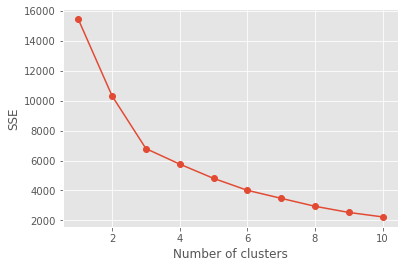

In [67]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(df_encoded)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
#Valore ottimale 3

<h2>Clustering attraverso K-Means</h2>

In [68]:
kclusters = 3 #scelta attraverso il grafico della elbow

kmeans = KMeans(n_clusters=kclusters, max_iter=300, random_state=7).fit(df_encoded)

In [69]:
labels = kmeans.labels_
print(labels)

[1 1 2 ... 0 0 1]


In [70]:
df_final["cluster"] = labels #aggiungo i cluster al df

In [71]:
df_final['cluster'].value_counts(ascending=True)

0     717
1    1288
2    1798
Name: cluster, dtype: int64

<h1>Rappresentazione dei cluster e considerazioni finali<h1>

In [72]:
cluster_0 = df_final.loc[df_final['cluster'] == 0, df_final.columns[[0]
+ list(range(1, df_final.shape[1]))]]

In [73]:
cluster_0.reset_index(drop=True, inplace=True)

In [74]:
cluster_0

,agent_name,agent_category,agent_os,device,browser.family,os.family,cluster
0,Safari,smartphone,iPhone,iPhone,Mobile Safari,iOS,0
1,Chrome,smartphone,iPad,iPad,Chrome Mobile iOS,iOS,0
2,Safari,smartphone,iPad,iPad,Mobile Safari,iOS,0
3,Safari,smartphone,iPad,iPad,Mobile Safari,iOS,0
4,Safari,smartphone,iPhone,iPhone,Mobile Safari,iOS,0
...,...,...,...,...,...,...,...
712,Safari,smartphone,iPhone,iPhone,Mobile Safari,iOS,0
713,Webview,smartphone,iPhone,iPhone,Mobile Safari UI/WKWebView,iOS,0
714,Safari,smartphone,iPhone,iPhone,Mobile Safari,iOS,0
715,Safari,smartphone,iPhone,iPhone,Mobile Safari,iOS,0


In [75]:
cluster_1 = df_final.loc[df_final['cluster'] == 1, df_final.columns[[0]
+ list(range(1, df_final.shape[1]))]]

In [76]:
cluster_1.reset_index(drop=True, inplace=True)

In [77]:
cluster_1

,agent_name,agent_category,agent_os,device,browser.family,os.family,cluster
0,Chrome,pc,Windows 10,Other,Chrome,Windows,1
1,Firefox,pc,Windows 10,Other,Firefox,Windows,1
2,Chrome,pc,Windows 7,Other,Chrome,Windows,1
3,Chrome,pc,Windows 7,Other,Chrome,Windows,1
4,Edge,pc,Windows 10,Other,Edge,Windows,1
...,...,...,...,...,...,...,...
1283,Internet Explorer,pc,Windows 8.1,Other,IE,Windows,1
1284,Chrome,pc,Windows 10,Other,Chrome,Windows,1
1285,Chrome,pc,Windows 10,Other,Chrome,Windows,1
1286,Safari,pc,Mac OSX,Other,Safari,Mac OS X,1


In [78]:
cluster_2 = df_final.loc[df_final['cluster'] == 2, df_final.columns[[0]
+ list(range(1, df_final.shape[1]))]]

In [79]:
cluster_2.reset_index(drop=True, inplace=True)

In [80]:
cluster_2

,agent_name,agent_category,agent_os,device,browser.family,os.family,cluster
0,Chrome,smartphone,Android,Generic Smartphone,Chrome,Android,2
1,Chrome,smartphone,Android,Generic Smartphone,Chrome Mobile,Android,2
2,Chrome,smartphone,Android,Generic Smartphone,Chrome Mobile,Android,2
3,Chrome,smartphone,Android,Generic Smartphone,Chrome Mobile,Android,2
4,Chrome,smartphone,Android,Generic Smartphone,Chrome Mobile,Android,2
...,...,...,...,...,...,...,...
1793,Chrome,smartphone,Android,Generic Smartphone,Chrome Mobile,Android,2
1794,Chrome,smartphone,Android,Generic Smartphone,Chrome Mobile,Android,2
1795,Chrome,smartphone,Android,Generic Smartphone,Chrome Mobile,Android,2
1796,Chrome,smartphone,Android,Samsung,Samsung Internet,Android,2


<h3>CLUSTER 0</h3>

In [81]:
agent_name_0 = cluster_0['agent_name'].value_counts(ascending=True)
agent_category_0 = cluster_0['agent_category'].value_counts(ascending=True)
agent_os_0 = cluster_0['agent_os'].value_counts(ascending=True)
device_0 = cluster_0['device'].value_counts(ascending=True)
browser_family_0 = cluster_0['browser.family'].value_counts(ascending=True)
os_family_0 = cluster_0['os.family'].value_counts(ascending=True)

<AxesSubplot:title={'center':'DEVICE'}>

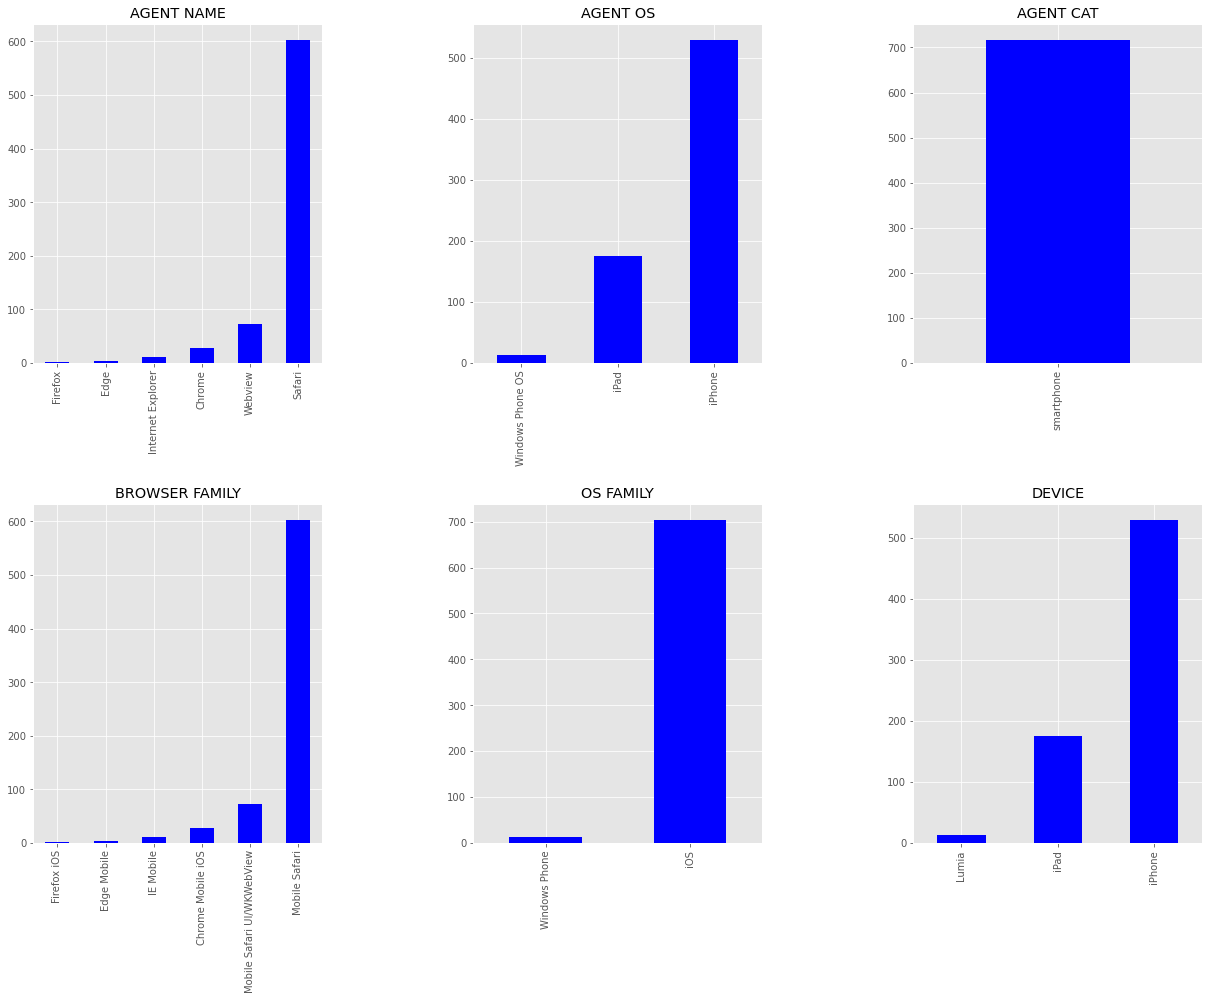

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
fig.tight_layout(pad = 12)

axes[0,0].set_title("AGENT NAME")
axes[0,1].set_title("AGENT OS")
axes[0,2].set_title("AGENT CAT")
axes[1,0].set_title("BROWSER FAMILY")
axes[1,1].set_title("OS FAMILY")
axes[1,2].set_title("DEVICE")

agent_name_0.plot(kind = 'bar', color = 'blue', ax=axes[0,0])
agent_os_0.plot(kind = 'bar', color = 'blue', ax=axes[0,1])
agent_category_0.plot(kind = 'bar', color = 'blue', ax=axes[0,2])
browser_family_0.plot(kind = 'bar', color = 'blue', ax=axes[1,0])
os_family_0.plot(kind = 'bar', color = 'blue', ax=axes[1,1])
device_0.plot(kind = 'bar', color = 'blue', ax=axes[1,2])

In questo cluster si trova una maggioranza di dispositivi mobile e tablet di casa Apple(iPhone e iPad) ed una piccola percentuale di dispositivi Microsoft (Lumia), questa distribuzione è coerente anche con gli OS presenti nel cluster (Windows Phone OS e iOS) e con i browser utilizzati dove safari presenta il maggior numero di occorrenze

<h3>CLUSTER 1</h3>

In [83]:
agent_name_1 = cluster_1['agent_name'].value_counts(ascending=True)
agent_category_1 = cluster_1['agent_category'].value_counts(ascending=True)
agent_os_1 = cluster_1['agent_os'].value_counts(ascending=True)
device_1 = cluster_1['device'].value_counts(ascending=True)
browser_family_1 = cluster_1['browser.family'].value_counts(ascending=True)
os_family_1 = cluster_1['os.family'].value_counts(ascending=True)

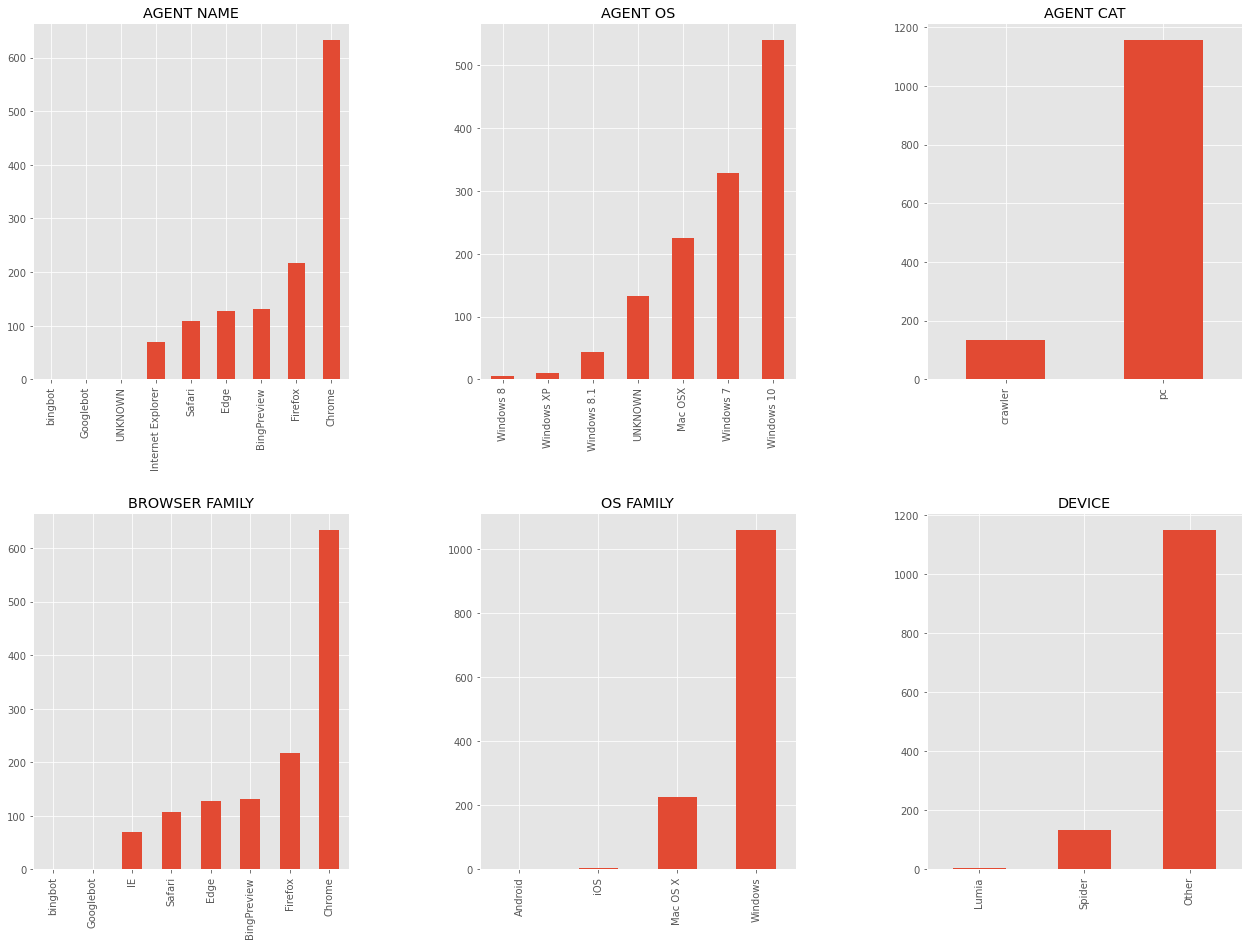

In [84]:
fig1, axes1 = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

axes1[0,0].set_title("AGENT NAME")
axes1[0,1].set_title("AGENT OS")
axes1[0,2].set_title("AGENT CAT")
axes1[1,0].set_title("BROWSER FAMILY")
axes1[1,1].set_title("OS FAMILY")
axes1[1,2].set_title("DEVICE")


fig1.tight_layout(pad = 10)
agent_name_1.plot(kind = 'bar', ax=axes1[0,0])
agent_os_1.plot(kind = 'bar', ax=axes1[0,1])
agent_category_1.plot(kind = 'bar', ax=axes1[0,2])
browser_family_1.plot(kind = 'bar', ax=axes1[1,0])
os_family_1.plot(kind = 'bar', ax=axes1[1,1])
device_1.plot(kind = 'bar', ax=axes1[1,2])
plt.show()

In questo cluster c'è una maggioranza di pc e una minoranza di crawler. Mi concentro sui pc facendo qualche considerazione: Non c'è distinzione tra pc e mac (entrambi vengono classificati come pc), però le macchine Windows sono quelle più utilizzate perchè gli OS che vanno per la maggiore sono Windows 7 e Windows 10 seguiti a ruota da Mac OSX. Si noti anche che le versioni di Windows più vecchie(XP) o poco performanti(8) sono poco utilizzate. I browser più utilizzati sono Chrome e Firefox

<h3>CLUSTER 2</h3>

In [85]:
agent_name_2 = cluster_2['agent_name'].value_counts(ascending=True)
agent_category_2 = cluster_2['agent_category'].value_counts(ascending=True)
agent_os_2 = cluster_2['agent_os'].value_counts(ascending=True)
device_2 = cluster_2['device'].value_counts(ascending=True)
browser_family_2 = cluster_2['browser.family'].value_counts(ascending=True)
os_family_2 = cluster_2['os.family'].value_counts(ascending=True)

<AxesSubplot:title={'center':'DEVICE'}>

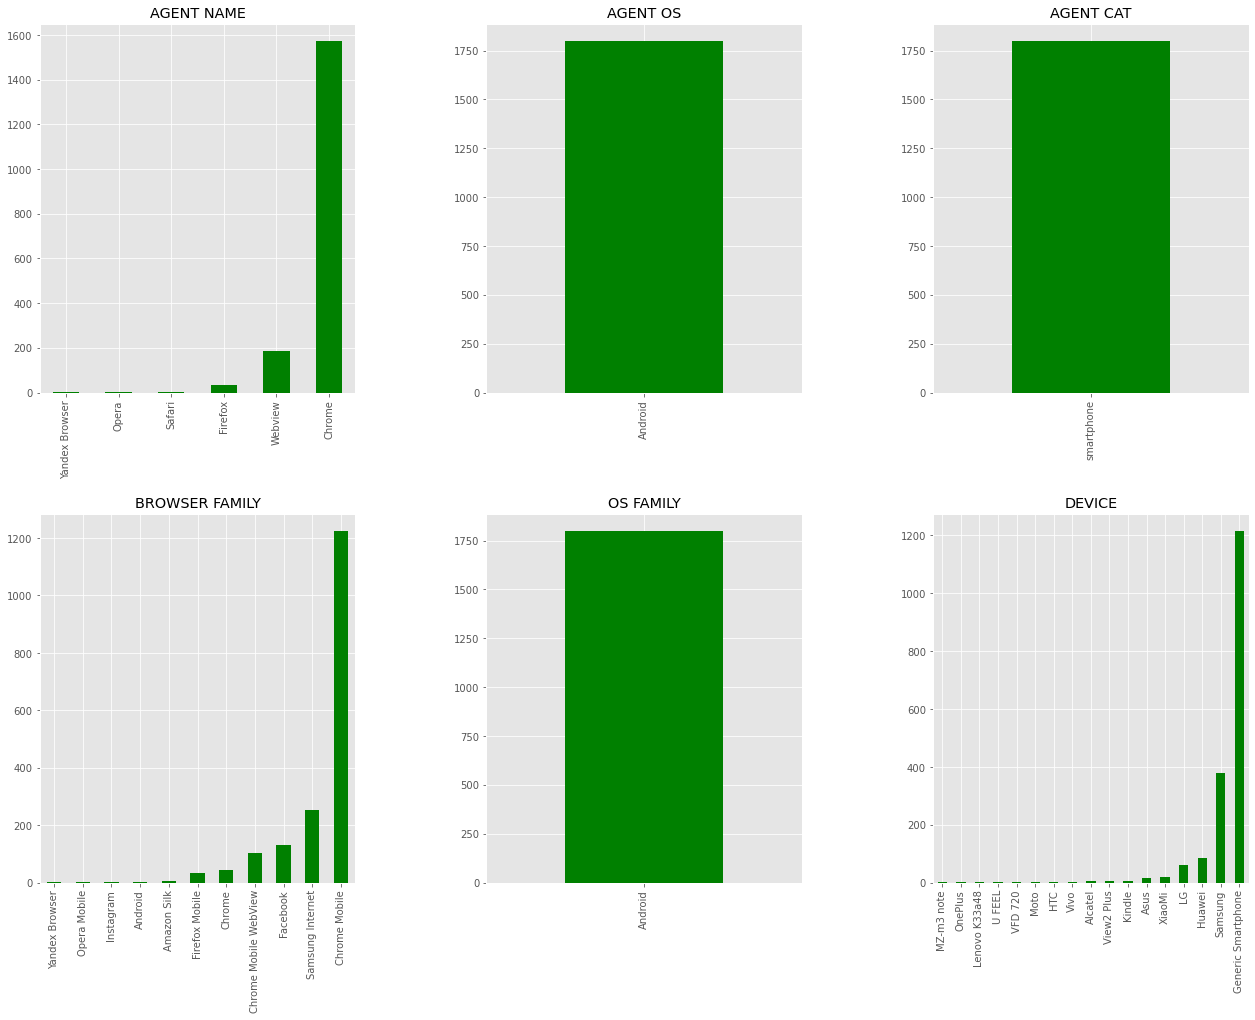

In [86]:
fig2, axes2 = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
fig2.tight_layout(pad = 10)

axes2[0,0].set_title("AGENT NAME")
axes2[0,1].set_title("AGENT OS")
axes2[0,2].set_title("AGENT CAT")
axes2[1,0].set_title("BROWSER FAMILY")
axes2[1,1].set_title("OS FAMILY")
axes2[1,2].set_title("DEVICE")


agent_name_2.plot(kind = 'bar', color = 'green', ax=axes2[0,0])
agent_os_2.plot(kind = 'bar', color = 'green', ax=axes2[0,1])
agent_category_2.plot(kind = 'bar', color = 'green', ax=axes2[0,2])
browser_family_2.plot(kind = 'bar', color = 'green', ax=axes2[1,0])
os_family_2.plot(kind = 'bar', color = 'green', ax=axes2[1,1])
device_2.plot(kind = 'bar', color = 'green', ax=axes2[1,2])


Questo cluster è quello più "monolitico" ed è quindi il più semplice da interpretare. Esso contiene esclusivamente il
mondo Android, quindi tutti gli smartphone estranei ad Apple e Microsoft. All'interno di questo cluster sono presenti
dispositivi provenienti da diverse case produttrici (Samsung, Huawei, ecc...), sfortunatamente la maggior parte di essi
non vengono classificati all'interno del dataset e rientrano nell'etichetta "Generic Smartphone"

<h1>Considerazioni Finali</h1>

A valle delle osservazioni svolte sui cluster possiamo concludere che:
<br><br><br>
    1. I dispositivi più utilizzati per interagire con il sito https://www.ecodibergamo.it/ sono smartphone con os Android<br><br>
    2. Gli iPhone sono meno usati dei dispositivi Android e dei PC, superano solo i crawler e gli smartphone Windows(ormai fuori dal mercato)<br><br>
    3. Nella categoria dei dispositivi fissi(PC e MAC) i PC con Windows 10 e Windows 7 prevalgono sui MAC, mentre versioni di Windows obsolete (XP e 8) sono poco usate, è interessante notare che Windows 7 è più utilizzato di Windows 8<br><br>
    4. Il browser più utilizzato è Chrome, tranne su dispositivi iOS dove si preferisce Safari